# Project: Investigate a Dataset [ TMDb Movie Data (tmdb-movies.csv) ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
>● Certain columns, like ‘ cast’
and ‘ genres’ , contain multiple
values separated by pipe (|)
characters.
>
>● There are some odd characters
in the ‘ cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
>
>● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for  inflation over
time

# Description of Dataset 
> ● We are going to work with movie dataset contains data
about 10,000 movies

## Questions for analysis
> ● Which genres has highest releases over years?
>
> ● What
kinds of properties
are associated with
movies that have high
revenues?
>
> ● Which genres are
most popular from
year to year?
>
> ● What is the frequency of (popularity,runtime,revenue,rlease_year)?
>
> ● what is the affect of datetime on movies runtime?

In [76]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [77]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("tmdb-movies.csv")
df.tail()

id    imdb_id  popularity  budget  revenue  \
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                 original_title  \
10861        The Endless Summer   
10862                Grand Prix   
10863       Beregis Avtomobilya   
10864    What's Up, Tiger Lily?   
10865  Manos: The Hands of Fate   

                                                    cast homepage  \
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
10861         Bruce Brown                                                NaN   
10862  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
10863      Eldar Ryazanov                                                NaN   
10864         Woody Allen                          WOODY ALLEN STRIKES BACK!   
10865    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

       ...                                           overview runtime  \
10861  ...  The Endless Summer, by Bruce Brown, is one of ...      95   
10862  ...  Grand Prix driver Pete Aron is fired by his te...     176   
10863  ...  An insurance agent who moonlights as a carthie...      94   
10864  ...  In comic Woody Allen's film debut, he took the...      80   
10865  ...  A family gets lost on the road and stumbles up...      74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies release_date  \
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

      vote_count  vote_average  release_year     budget_adj  revenue_adj  
10861         11           7.4          1966       0.000000          0.0  
10862         20           5.7          1966       0.000000          0.0  
10863         11           6.5          1966       0.000000          0.0  
10864         22           5.4          1966       0.000000          0.0  
10865         15           1.5          1966  127642.279154          0.0  

[5 rows x 21 columns]

In [78]:
# shape of Data
df.shape

(10866, 21)

In [79]:
df.genres.value_counts()

Drama                                               712
Comedy                                              712
Documentary                                         312
Drama|Romance                                       289
Comedy|Drama                                        280
                                                   ... 
Fantasy|Drama|Action                                  1
Science Fiction|Action|Thriller|Adventure             1
Drama|Action|Science Fiction|Thriller                 1
Action|Fantasy|Horror|Thriller                        1
Action|Adventure|Science Fiction|Thriller|Horror      1
Name: genres, Length: 2039, dtype: int64

Dataset consists of 10866 row(s) and 21 column(s)

In [80]:
# inspection for null and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> release_date column should be converted from object to datetime
>
>null values should be replaced by zero (0) value

In [81]:
# Check for duplications
df.duplicated().sum()

1

Dataset contains one identical duplication of rows (we will remove that row in Cleaning data stages)

In [82]:
# Check for number of unique values in (original_title) column
df.original_title.nunique()

10571

Only 10571 out of 10866 are unique values in (original_title) column
>
Duplicated values here beacuse some movies are part from a complete series like Batman
>
So i will work with id and original_title columns

In [83]:
# Check for number of duplicated values in (original_title , id) columns
df[df.duplicated(["id","original_title"])] # i use geeksforgeeks.org to find out this Trick

id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]

There is 1 out of 10866 values are duplicated in (original_title and id ) columns

In [84]:
# Check for null values in Dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Only 10 out of 10866 in (imdb_id) column are duplicated 

In [85]:
# some information about our data
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

### Data Cleaning

#### 1- remove dublicate rows

In [86]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# remove duplicate values
df.drop_duplicates(inplace=True)

In [87]:
# Check for remove duplicates
df.duplicated().sum()

0

#### 2- change null values with zero (0)

In [88]:
df=df.fillna(0)

In [89]:
#check for null values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### 3-change datetime format

In [90]:
#release_date column should be converted from object to datetime
df.release_date=pd.to_datetime(df.release_date)

In [91]:
#check for release_date column values type 
df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 4-remove columns that i don not need

In [92]:
#I will not use those columns in my Analysis process
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)

In [93]:
df.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   
2  based on novel|revolution|dystopia|sequel|dyst...      119   
3              android|spaceship|jedi|space opera|3d      136   
4                car race|speed|revenge|suspense|car      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [94]:
#Check for remove unused columns
df.shape

(10865, 15)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres has highest releases over years?)

In [95]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# we need to concatenate genres column values
#we will creat a new data frame ,but first we should filter dataset from zero values
df_new=df[df.genres!=0]
genres_str=df_new.genres.str.cat(sep="|")
genres_list=genres_str.split("|")

In [96]:
#Check for genres list
genres_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [97]:
#genres series
df_genres=pd.Series(genres_list)
df_genres

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
26950            Mystery
26951             Comedy
26952             Action
26953             Comedy
26954             Horror
Length: 26955, dtype: object

In [98]:
#genres count
genres_count=df_genres.value_counts()
genres_count

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

Text(0, 0.5, 'Counts over years')

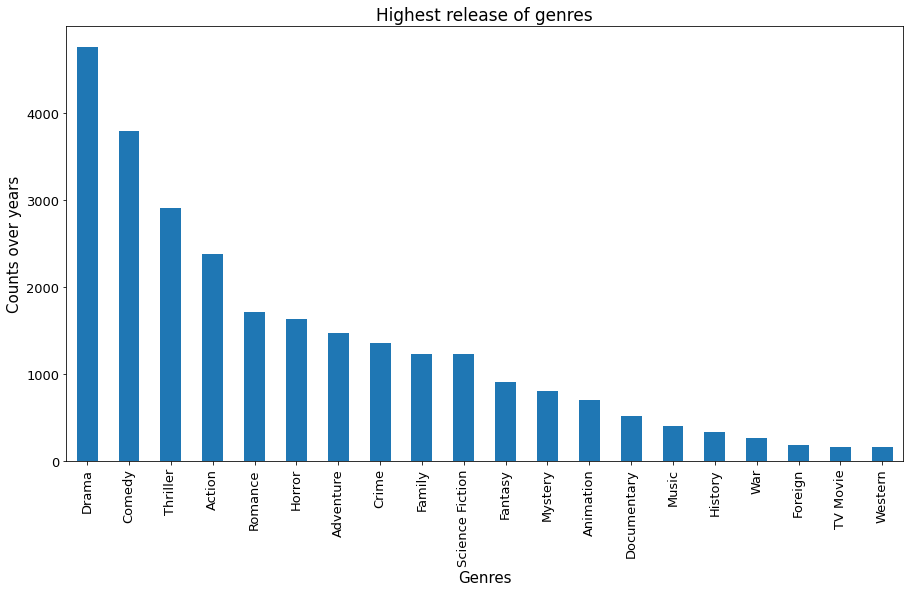

In [99]:
#plot a (bar) for genres to show Which genres has highest releases over years
genres_count.plot(kind="bar",figsize=(15,8),fontsize=13);
plt.title("Highest release of genres",fontsize=17)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Counts over years",fontsize=15)

### Research Question 2 (What kinds of properties are associated with movies that have high revenues?)

###### runtime vs revenue

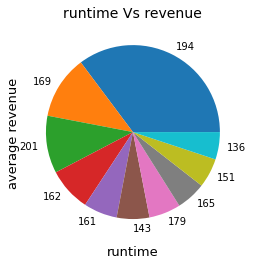

In [100]:
# using groupby function to plot a pie chart between runtime and revenue
runtime_with_revenue=df.groupby("runtime")["revenue"].mean().sort_values(ascending = False)
runtime_with_revenue[:10].plot(kind="pie",figsize = (10,4));
plt.title("runtime Vs revenue",fontsize = 14);
plt.xlabel('runtime',fontsize = 13);
plt.ylabel('average revenue',fontsize = 13);

###### genres vs revenue

In [101]:
# using groupby function to plot a bar chart between genres and revenue
genres_with_revenue=df.groupby("genres")["revenue"].mean().sort_values(ascending = False)
# I will choose only the first 200 row
genres_with_revenue[:200]

genres
Crime|Drama|Mystery|Thriller|Action               1.106280e+09
Action|Adventure|Science Fiction|Fantasy          1.034089e+09
Family|Fantasy|Adventure                          1.025467e+09
Adventure|Fantasy|Family|Mystery                  9.382127e+08
Science Fiction|Thriller|Action|Adventure         8.474235e+08
                                                      ...     
Action|Adventure|Drama|Mystery|Science Fiction    1.537232e+08
Action|Mystery|Science Fiction|Thriller           1.528179e+08
Drama|Fantasy|Romance|Science Fiction             1.520364e+08
Drama|Horror|Music                                1.520000e+08
Fantasy|Drama|Comedy|Romance|Family               1.516688e+08
Name: revenue, Length: 200, dtype: float64

In [102]:
#genres values concatenate
genres_with_revenue_idex_list=genres_with_revenue[:200].index.str.cat(sep="|").split("|")
genres_with_revenue_idex_list_series=pd.Series(genres_with_revenue_idex_list)
genres_with_revenue_idex_list_series.value_counts()

Adventure          123
Action             106
Fantasy             76
Science Fiction     67
Comedy              67
Family              66
Thriller            58
Drama               57
Animation           43
Mystery             27
Crime               25
Romance             22
War                 16
Horror              15
Music               11
History             10
Western              7
dtype: int64

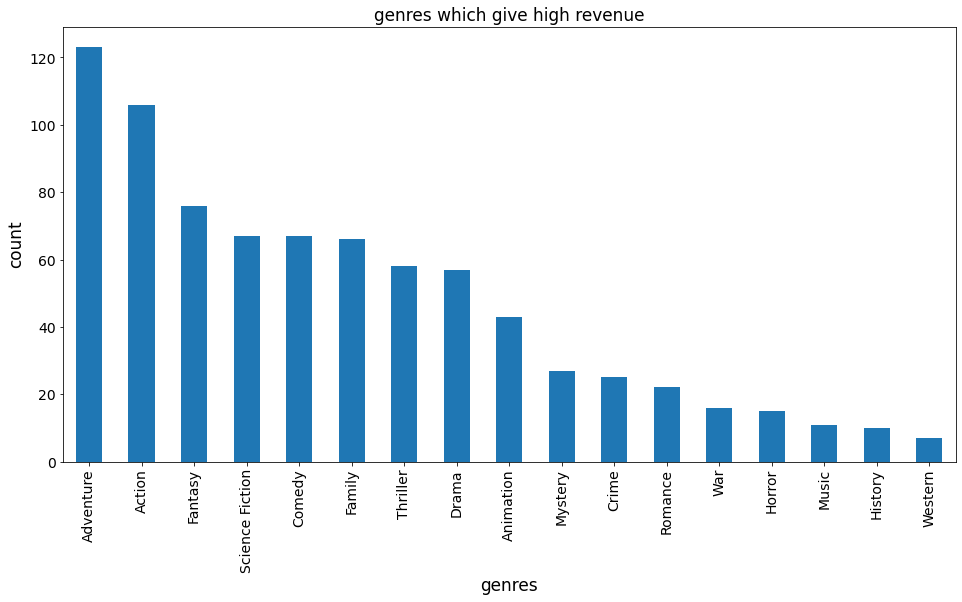

In [103]:
# bar chart for genres to show which genres give high revenue
genres_revenue_count_bar=genres_with_revenue_idex_list_series.value_counts()
genres_revenue_count_bar.plot(kind="bar",figsize=(16,8),fontsize=14);
plt.title("genres which give high revenue",fontsize=17);
plt.xlabel("genres",fontsize=17);
plt.ylabel("count",fontsize=17);

### Research Question 3  (Which genres are most popular from year to year?)

In [104]:
# using groupby function to find out which genres are most popular
genres_with_popularity=df.groupby("genres")["popularity"].mean().sort_values(ascending = False)
genres_with_popularity

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
                                                       ...    
Documentary|Drama|Foreign                             0.004590
Horror|Mystery|Thriller|Crime                         0.002381
Drama|Thriller|Science Fiction|Romance|Foreign        0.001983
Crime|Drama|History|Documentary                       0.001372
Mystery|Comedy|Drama                                  0.000188
Name: popularity, Length: 2040, dtype: float64

In [105]:
# here i choose only the first 200 row as i sort th output in the previous step
genres_with_popularity_idex_list=genres_with_popularity[:200].index.str.cat(sep="|").split("|")
genres_with_popularity_idex_list_series=pd.Series(genres_with_popularity_idex_list)
genres_with_popularity_idex_list_series.value_counts()

Adventure          111
Action             100
Fantasy             75
Science Fiction     75
Drama               67
Thriller            63
Comedy              56
Family              53
Animation           37
Crime               28
Mystery             28
Romance             27
Horror              16
War                 12
History              9
Music                9
Western              4
TV Movie             1
dtype: int64

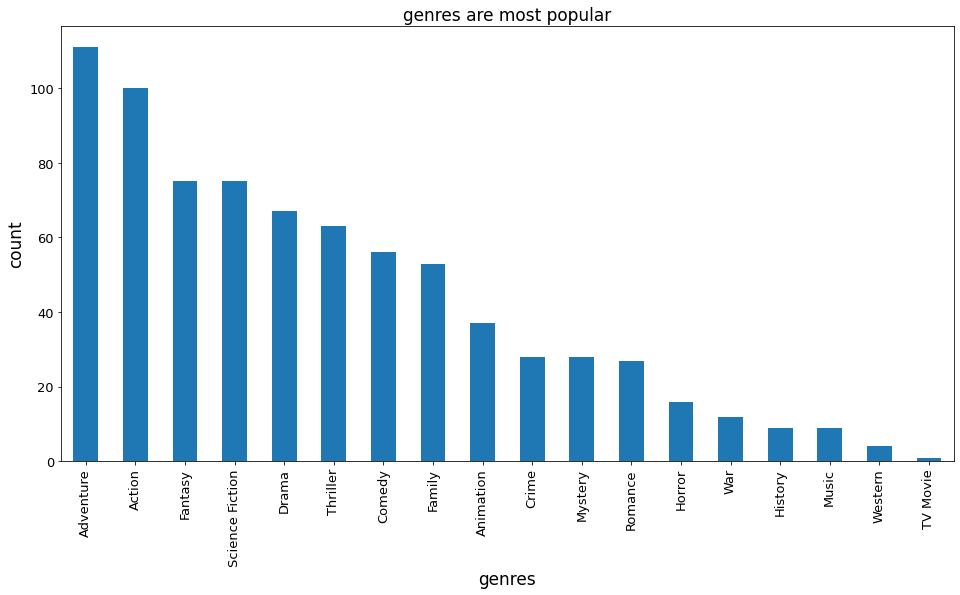

In [106]:
# plot a (pie) chart to show wich genres are most popular
genres_count_bar=genres_with_popularity_idex_list_series.value_counts()
genres_count_bar.plot(kind="bar",figsize=(16,8),fontsize=13)
plt.title("genres are most popular",fontsize=17);
plt.xlabel("genres",fontsize=17);
plt.ylabel("count",fontsize=17);

### Research Question 4 (What is the frequency of (popularity,runtime,revenue,rlease_year)?

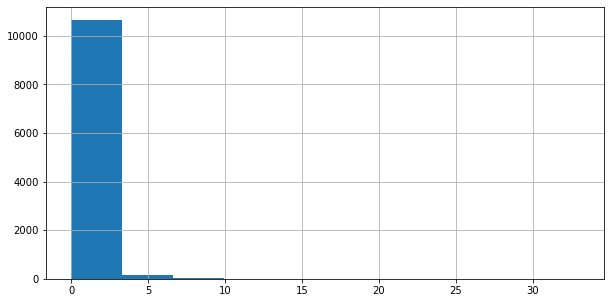

In [107]:
#histogram show us the frequency of indvidual parameters
df.popularity.hist(figsize=(10,5));

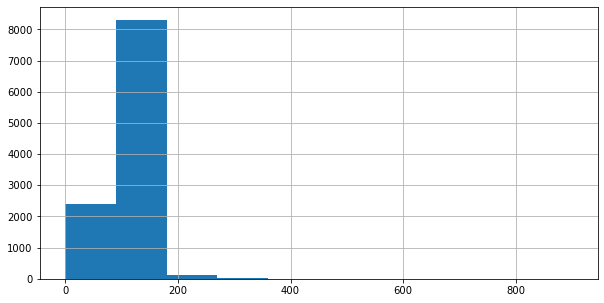

In [108]:
df.runtime.hist(figsize=(10,5));

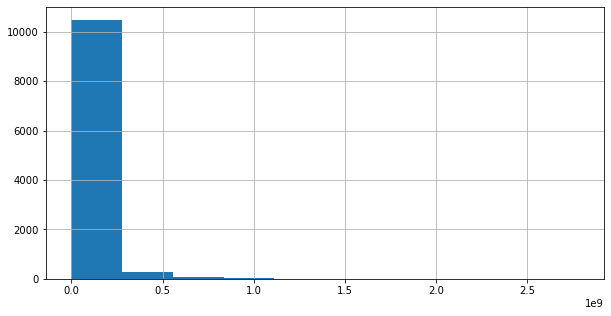

In [109]:
df.revenue.hist(figsize=(10,5));

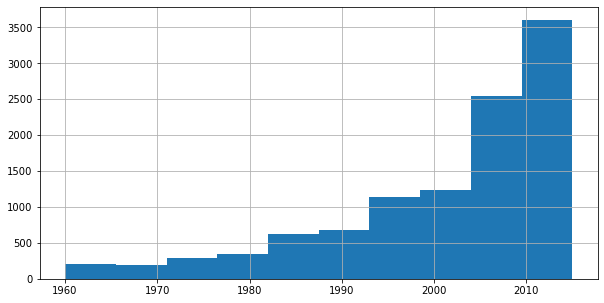

In [110]:
df.release_year.hist(figsize=(10,5));

## Research Question 5 :(what is the affect of datetime on movies runtime )?

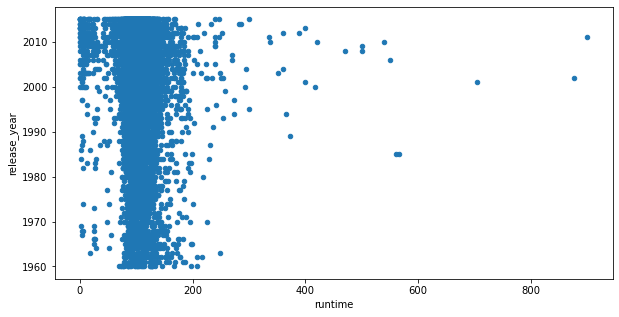

In [111]:
df.plot(kind="scatter",x="runtime",y="release_year",figsize=(10,5));

## Conclusions

#### ● From question 1 :visualization show us that (Drama,Comedy,Thriller,Action) are the most released genres over years
>
#### ● From question 2 :visualization show us that runtime:194 min , and genres: (Adventure,Action) are properties are
#### associated with movies that have high revenues?
>
#### ● From question 3 :visualization show us that(Adventure,Action) are most popular genres
>
#### ● From question 4 : histograms show us the frequency of (revenue,runtime,release_year,popularity)
>
#### ● From question 5 : scatter plot show us that runtime dose not affected by time 

## Limitations

we are not sure if the data provided to us is completel corect and up-to-date.the budget and revenue column dare based on dollar$ , it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. i want to Drop the rows with missing values but it will affecte the overall analysis.During the data cleaning process, I split the data seperated by '|' into lists for easy parsing during the exploration phase. This increases the time taken in calculating the result.